In [38]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
#%matplotlib inline

In [39]:
# функция возвращает список друзей
def get_friends_ids(user_id, token):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v=5.92' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    resp = requests.get(friends_url.format(user_id, token))
    assert resp.status_code == 200
    json_response = resp.json()
    
    if json_response.get('error'):
        print(json_response)
        if json_response['error']['error_code'] == 30:
            print('Private profile')
            return []
        elif json_response['error']['error_code'] == 15:
            print('Deactivated user')
            return []
        return []
    return json_response['response']['items']

In [40]:
graph = {}
user_id = 43447713
token = '31735d2131735d2131735d21ed312e2ad13317331735d21680479f80bb70a7b7d66fca7'
friend_ids = get_friends_ids(user_id, token)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    graph[friend_id] = get_friends_ids(friend_id, token)
    print ('Processed id: ', friend_id, len(graph[friend_id]) )

('Processed id: ', 211397, 5000)
('Processed id: ', 246198, 719)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'304713', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 304713, 0)
('Processed id: ', 345019, 201)
('Processed id: ', 1715493, 1082)
('Processed id: ', 1900843, 220)
('Processed id: ', 1933899, 5000)
('Processed id: ', 2167414, 254)
('Processed id: ', 2273914, 506)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'3073352', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 3073352, 0)
('Processed id: ', 3087715, 796)
('Processed id: ', 3167015, 424)
('Processed id: ', 3415124, 391)
{u'error': {u'error_code': 30, 

{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'32255726', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 32255726, 0)
('Processed id: ', 34581627, 217)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'34693288', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 34693288, 0)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'35823867', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 35823867, 0)
('Processed id: ', 36629006, 173)
('Processed id

{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'311177249', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 311177249, 0)
('Processed id: ', 318118262, 127)
('Processed id: ', 321393712, 32)
('Processed id: ', 334241233, 14)
('Processed id: ', 356779440, 5)
('Processed id: ', 382713418, 83)
('Processed id: ', 406121243, 113)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'value': u'437547752', u'key': u'user_id'}, {u'value': u'5.92', u'key': u'v'}]}}
Private profile
('Processed id: ', 437547752, 0)
{u'error': {u'error_code': 30, u'error_msg': u'This profile is private', u'request_params': [{u'value': u'1', u'key': u'oauth'}, {u'value': u'friends.get', u'key': u'method'}, {u'

In [41]:
g = networkx.Graph(directed=False)

In [42]:
# соединяем друзей дружащих друг с другом
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [43]:
def get_info_about(user_ids, token, fields=None):
    fields = fields or ['first_name', 'last_name', 'sex', 'bdate', 'status']
    
    url = 'https://api.vk.com/method/users.get?user_ids={}&access_token={}&fields={}&v=5.92'.format(','.join(user_ids),token, ','.join(fields))
    resp=requests.get(url)
    #print(resp, resp.text)
    assert resp.status_code == 200 and not resp.json().get('error')
    data = resp.json()
    users = data['response']
    return users

In [44]:
nodes = g.nodes()
labels = [str(x) for x in nodes]# nx.get_node_attributes(g, 'label').values()
attributes = get_info_about(labels, token)
attr_map = dict(zip(nodes, attributes))
for k, v in attr_map.items():
    v['full_name'] = v['first_name'] + ' ' + v['last_name']

target_attrs = ['sex', 'bdate', 'full_name']
for k in target_attrs:
    attr_values = {a: v.get(k) for a, v in attr_map.items()}
    nx.set_node_attributes(g, k, attr_values)

In [45]:
# сохраняем
networkx.write_gml(g, "network.gml")

In [46]:
graph = nx.read_gml('network.gml')

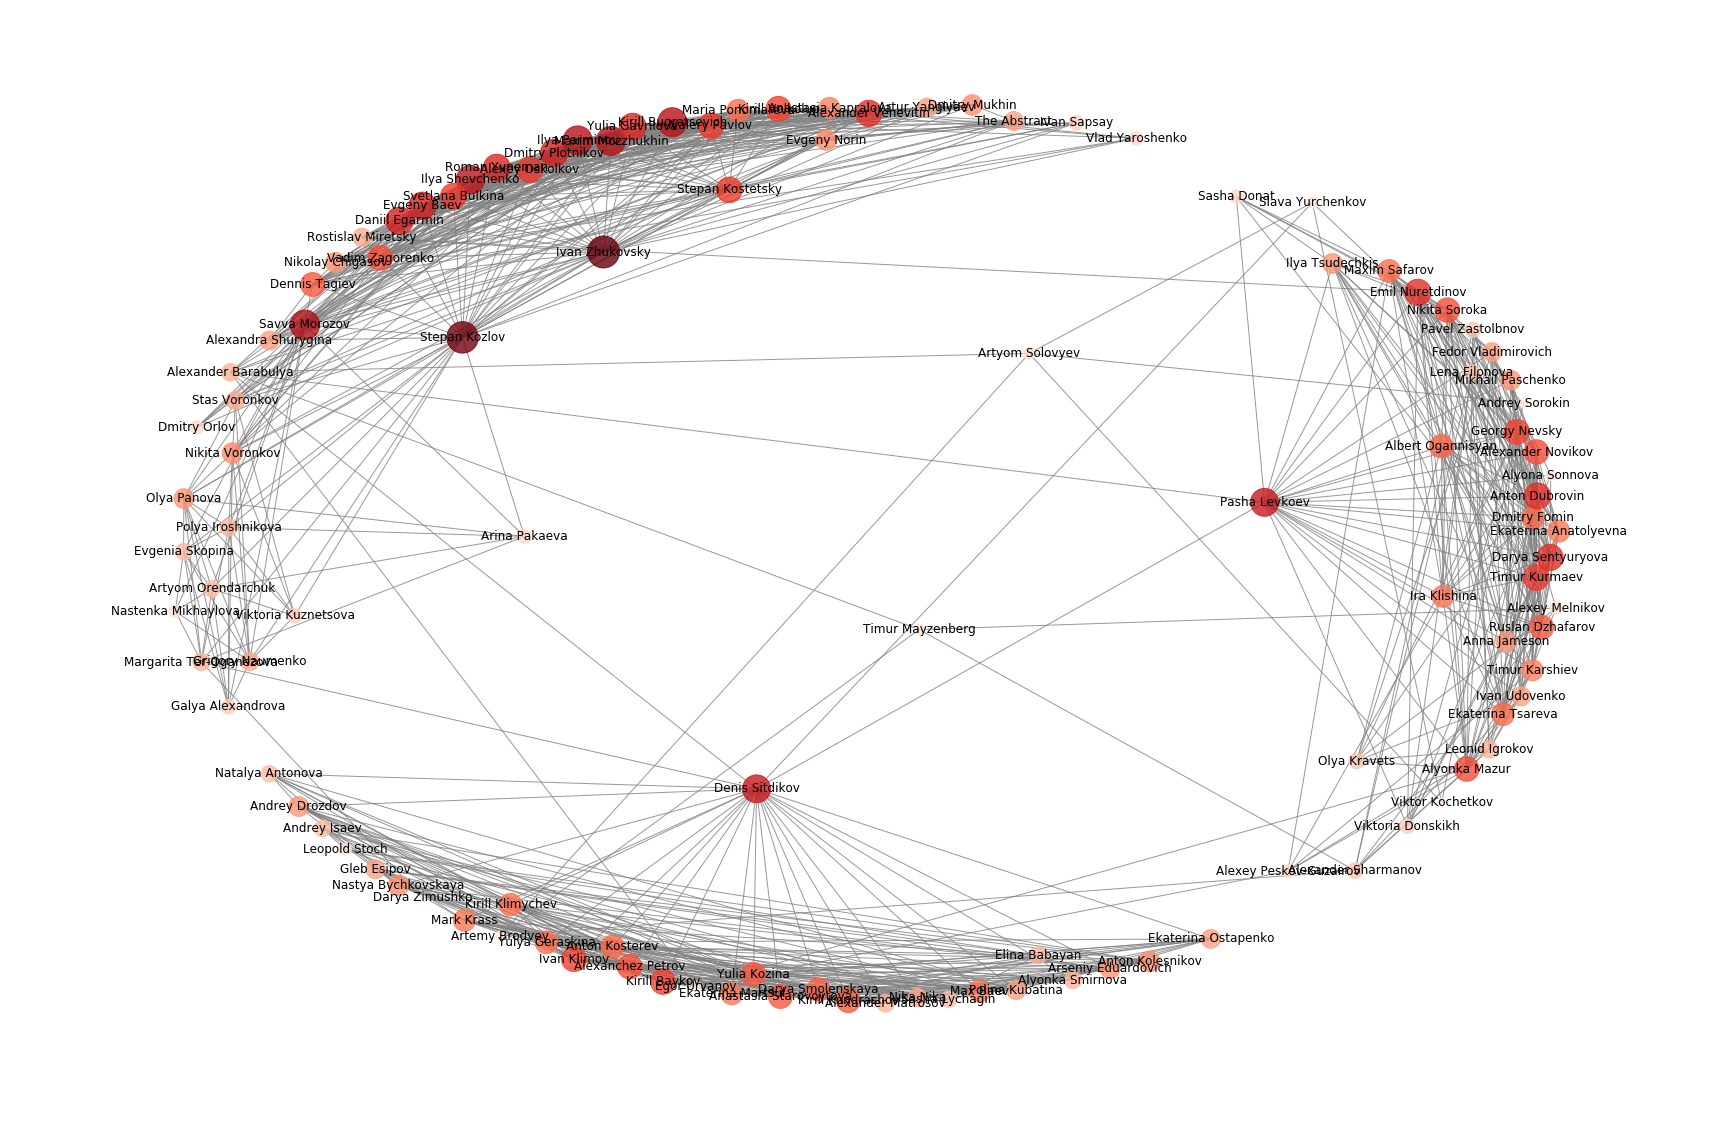

In [48]:
degree = nx.degree(graph)


filtered_nodes = [k for k, v in degree.items() if v > 5]
subgraph = nx.subgraph(graph, filtered_nodes)

degree = nx.degree(subgraph)
labels = nx.get_node_attributes(subgraph, 'full_name')

plt.figure(1, figsize=(30,20))
plt.axis('off')
pos = nx.spring_layout(subgraph, k=3/np.sqrt(subgraph.order()))
nx.draw_networkx(subgraph,
                 pos=pos,
                 node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.8)
plt.savefig('me.png')